In [184]:
%matplotlib inline

In [185]:
from __future__ import division
import os
from csv import writer
import yaml
import matplotlib.pyplot as plt
from csv import reader
import numpy as np
import pylab
import seaborn as sns
sns.set(style="whitegrid")

In [186]:
dirname_th = 'data_for_graphs/1Node_MultiServer/run_10000_itrs/'
dirname_sim = 'data_for_paper/1NodeMS/'
stateth = '0'
state = '((0, 0),)'
begin = 1
end = 5
step = 1
var = 'c'
leg_loc = 'l'
line_colour = 'darkgreen'
plot_colour = 'darkorange'
filename = 'vary' + var + '.pdf'

In [187]:
Ls = [round(i*step + begin, 2) for i in range(int((end-begin)/step)+1)]
mean_times_to_deadlock = []
median_times_to_deadlock = []
simulation_results = []
root = os.getcwd()
directoryth = os.path.join(root, dirname_th)
directorys = os.path.join(root, dirname_sim)

In [188]:
for i in Ls:
    if var[0] == 'n' or var[0] == 'c':
        parameter_file_name = directoryth + 'vary_' + var + '/theoretical_results_%s.yml' % str(int(i))
    else:
        parameter_file_name = directoryth + 'vary_' + var + '/theoretical_results_%s.yml' % str(i)
    parameter_file = open(parameter_file_name, 'r')
    parameters = yaml.load(parameter_file)
    parameter_file.close()
    mean_times_to_deadlock.append(parameters[stateth])

In [189]:
parameter_file_name = directorys + 'deadlocking_times_' + var + '.csv'
parameter_file = open(parameter_file_name, 'r')
rdr = reader(parameter_file)
temp = {}
for row in rdr:
    temp[row[0]] = row[1:]
print(temp.keys())
simulation_results = []
for i in Ls:
    simulation_results.append([float(obs) for obs in temp[str(i)]])
parameter_file.close()

dict_keys(['3', '2', '4', '1', '5'])


In [190]:
simulation_results_no_outliers = []
for data_series in simulation_results:
    q75, q25 = np.percentile(data_series, [75 ,25])
    iqr = q75 - q25
    upper = q75 + (1.5*iqr)
    lower = q25 - (1.5*iqr)
    new_data = [obs for obs in data_series if obs > lower and obs < upper]
    simulation_results_no_outliers.append(new_data)

In [191]:
if var[0] == 'c' or var[0] == 'n':
    Ls_show = [int(obs) for obs in Ls]
else:
    Ls_show = Ls

In [192]:
def plot_ttd(top=None):

    fig, ax = plt.subplots()
    plt.plot(Ls_show, mean_times_to_deadlock, linewidth=2, label='Analytical Mean', color=line_colour)
    plt.plot([], [], 'r', linewidth=2, label='Simulation Results', color=plot_colour)
    meanpointprops = dict(marker='D', markeredgecolor='black',
                          markerfacecolor=plot_colour)
    bp = plt.boxplot(simulation_results, positions=Ls_show, widths=step/2, meanprops=meanpointprops, meanline=False, showmeans=True, sym='')
    for median in bp['medians']:
        median.set(color=plot_colour, linewidth=2)
    pylab.setp(bp['boxes'], color=plot_colour)
    pylab.setp(bp['whiskers'], color=plot_colour)


    vp = plt.violinplot(simulation_results_no_outliers, widths=step/1.5, positions=Ls, showmeans=False, showmedians=False, showextrema=False)
    pylab.setp(vp['bodies'], color=plot_colour)

    if var[0] == 'L':
        ax.set_xlabel(r'$\Lambda_{'+var[1:]+'}$', fontsize=18)
    if var[0] == 'm':
        ax.set_xlabel(r'$\mu_{'+var[2:]+'}$', fontsize=18)
    if var[0] == 'n':
        ax.set_xlabel(r'$n_{'+var[1:]+'}$', fontsize=18)
    if var[0] == 'c':
        ax.set_xlabel(r'$c_{'+var[1:]+'}$', fontsize=18)
    if var[0] == 'r':
        ax.set_xlabel(r'$r_{'+var[1:]+'}$', fontsize=18)

    ax.set_ylabel('Time to Deadlock from ' + stateth, fontsize=18)

    ax.set_xlim(begin - step/2, end + step/2)
    ax.set_ylim(bottom=0, top=top)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 

    if leg_loc == 'l':
        loc=2
    if leg_loc == 'r':
        loc=1

    legend = plt.legend(loc=loc, prop={'size':20}, frameon=1)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('grey')


    return fig

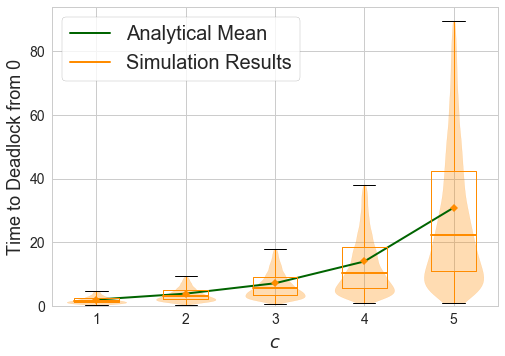

In [193]:
fig = plot_ttd();
fig.savefig(filename)